# Climate Indices — Example Session

## Command-Line Interface / File Based

In [1]:
!climate_index_collection_run --help

Usage: climate_index_collection_run [OPTIONS]

  Command line interface to the climate index collection.

Options:
  --input-path TEXT   Path to the input data.
  --output-path TEXT  Path to the output data.
  --model-names TEXT  Space separated list of the input data sources Defaults
                      to: "FOCI,CESM"
  --index-names TEXT  Space separated list of all indices you want to
                      calculate. Defaults to:
                      "southern_annular_mode,north_atlantic_oscillation"
  --help              Show this message and exit.


In [2]:
!climate_index_collection_run --input-path ../data/test_data/ --output-path . 

Will look for input data in: ../data/test_data/
Will write outputs to: .
Will calculate indices for: FOCI,CESM
Will calculate following indices: southern_annular_mode,north_atlantic_oscillation
/srv/conda/envs/notebook/lib/python3.9/site-packages/xarray/coding/times.py:673: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/srv/conda/envs/notebook/lib/python3.9/site-packages/xarray/core/indexing.py:423: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)
/srv/conda/envs/notebook/lib/python3.9/site-packages/xarray/coding/times.py:673: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.date

### Resulting output data

In [12]:
!head -n5 climate_indices.csv

time,model,index,value
2350-02-28 23:52:00,FOCI,SAM,0.6197199
2350-03-31 23:52:00,FOCI,SAM,1.7501345
2350-04-30 23:52:00,FOCI,SAM,1.4807087
2350-05-31 23:52:00,FOCI,SAM,1.0644104


### Read outputs and have a look

In [3]:
import pandas as pd
import seaborn as sns

sns.set_style("darkgrid")

In [4]:
climind = pd.read_csv("climate_indices.csv")
display(climind)

,time,model,index,value
0,2350-02-28 23:52:00,FOCI,SAM,0.619720
1,2350-03-31 23:52:00,FOCI,SAM,1.750134
2,2350-04-30 23:52:00,FOCI,SAM,1.480709
3,2350-05-31 23:52:00,FOCI,SAM,1.064410
4,2350-06-30 23:52:00,FOCI,SAM,0.011575
...,...,...,...,...
475,0010-10-01 00:00:00,CESM,NAO,0.072644
476,0010-11-01 00:00:00,CESM,NAO,0.059003
477,0010-12-01 00:00:00,CESM,NAO,-0.752753
478,0011-01-01 00:00:00,CESM,NAO,-2.803662


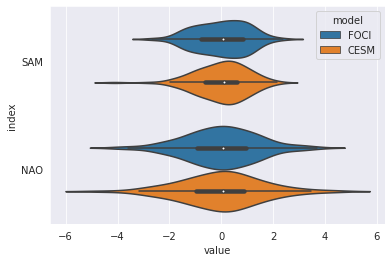

In [5]:
ax = sns.violinplot(
    data=climind,
    hue="model",
    y="index",
    x="value",
)

## Directly calling the module

In [6]:
from climate_index_collection.output import compute_index
from climate_index_collection.indices import (
    north_atlantic_oscillation,
    southern_annular_mode,
)

In [7]:
compute_index?

Signature:
compute_index(
    data_path='../data/test_data/',
    data_source_name='FOCI',
    index_function=<function southern_annular_mode at 0x7f7698e6cee0>,
)
Docstring:
Compute index from data source and return xarray DataArray.

Parameters
----------
data_path: str | path
    Location of the data files. Defaults to "data/test_data/".
data_source_name: str
    Name of the model dataset. Defaults to "FOCI".
index_function: function
    Index function. Defaults to southern_annular_mode.

Returns
-------
xarray DataArray
File:      /work/climate_index_collection/output.py
Type:      function


/srv/conda/envs/notebook/lib/python3.9/site-packages/xarray/coding/times.py:673: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/srv/conda/envs/notebook/lib/python3.9/site-packages/xarray/core/indexing.py:423: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)


<xarray.DataArray 'SAM' (time: 120)>
dask.array<truediv, shape=(120,), dtype=float32, chunksize=(120,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 2350-02-28 23:52:00 ... 2360-01-31 23:52:00

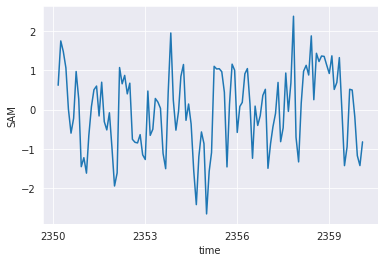

In [8]:
FOCI_SAM = compute_index(
    data_path="../data/test_data/", 
    data_source_name="FOCI", 
    index_function=southern_annular_mode,
)
display(FOCI_SAM)
FOCI_SAM.plot();

/srv/conda/envs/notebook/lib/python3.9/site-packages/xarray/coding/times.py:673: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/srv/conda/envs/notebook/lib/python3.9/site-packages/xarray/core/indexing.py:423: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)


<xarray.DataArray 'NAO' (time: 120)>
dask.array<sub, shape=(120,), dtype=float32, chunksize=(120,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 2350-02-28 23:52:00 ... 2360-01-31 23:52:00

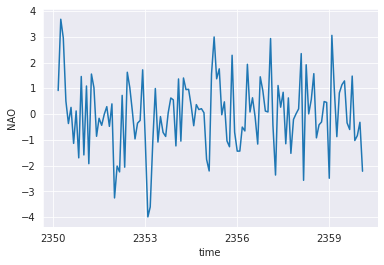

In [9]:
FOCI_NAO = compute_index(
    data_path="../data/test_data/", 
    data_source_name="FOCI", 
    index_function=north_atlantic_oscillation,
)
display(FOCI_NAO)
FOCI_NAO.plot();

<xarray.DataArray 'SAM' (time: 120)>
dask.array<truediv, shape=(120,), dtype=float32, chunksize=(120,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 0001-03-01 00:00:00 ... 0011-02-01 00:00:00

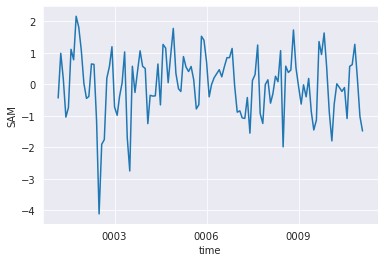

In [10]:
CESM_SAM = compute_index(
    data_path="../data/test_data/", 
    data_source_name="CESM", 
    index_function=southern_annular_mode,
)
display(CESM_SAM)
CESM_SAM.plot();

<xarray.DataArray 'NAO' (time: 120)>
dask.array<sub, shape=(120,), dtype=float32, chunksize=(120,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 0001-03-01 00:00:00 ... 0011-02-01 00:00:00

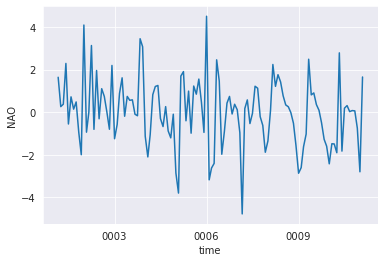

In [11]:
CESM_NAO = compute_index(
    data_path="../data/test_data/", 
    data_source_name="CESM", 
    index_function=north_atlantic_oscillation,
)
display(CESM_NAO)
CESM_NAO.plot();